In [1]:
import numpy as np
import sys
import copy
sys.path.append('/home/hcleroy/PostDoc/Simulation/Aging_Condensates/Gillespie_backend/')
from Gillespie_backend import *
import matplotlib.pyplot as plt
import tqdm
from multiprocessing import Pool
%matplotlib inline
plt.rcParams["figure.figsize"] = (4,3)

$\tau_0 = $22026.465794806718


(<Figure size 288x216 with 1 Axes>, <Axes3DSubplot:xlabel='x', ylabel='y'>)

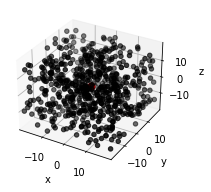

In [2]:
step_tot = 100000

ell_tot = 100.
rho0 = 1/100
BindingEnergy = -10.


tau_0 = np.exp(-BindingEnergy)
print(r'$\tau_0 = $'+str(tau_0))

S = Gillespie(ell_tot,rho0,BindingEnergy,kdiff=np.exp(BindingEnergy),seed=19880,sliding=True)
#S = Gillespie(ell_tot,rho0,BindingEnergy,kdiff=0,seed=19880,sliding=True)
S.Plot3DGillespie()

In [3]:
Nloops = np.zeros(step_tot,dtype=int)
bind = np.zeros(step_tot,dtype=int)
for step in range(step_tot):
    bind[step],time = S.evolve(steps=1)
    Nloops[step] = S.get_N_loop()

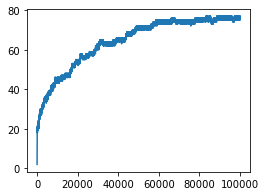

In [4]:
X = np.arange(0,step_tot,1)
plt.plot(X,Nloops)
#plt.xscale('log')
#plt.yscale('log')

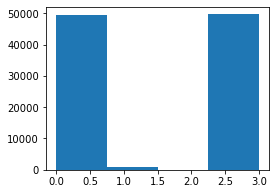

In [5]:
count,bin,graph = plt.hist(bind,bins=4)
#plt.xticks([0,1,2,3],['unbind','diffuse_linker','slide','bind'])
#plt.show()

In [6]:
percent_diff_moves = count[1]/step_tot

In [7]:
def diff_moves_loop(rho,ell,E):
    S = Gillespie(ell,rho,E,kdiff=np.exp(E),seed=19880,sliding=False)
    Nloops = np.zeros(step_tot,dtype=int)
    bind = np.zeros(step_tot,dtype=int)
    for step in range(step_tot):
        bind[step],time = S.evolve(steps=1)
        Nloops[step] = S.get_N_loop()
    count,bin,graph = plt.hist(bind,bins=4)
    return count[1]/step_tot,count[0]/step_tot,sum(Nloops)/step_tot

In [9]:
rhomin,rhomax,Npoints = 10**-4,10**-2,100
Nreplica = 12


#for replica in range(Nreplica):
with Pool(10) as p:
    count_N_av = p.starmap(diff_moves_loop,zip(np.linspace(rhomin,rhomax,Npoints),
                            np.array([100 for _ in range(Npoints)]),
                            np.array([-10 for _ in range(Npoints)])))

In [10]:
count_N_av = np.array(count_N_av)
print(count_N_av[0])

[0.20567 0.39716 2.80389]


Text(0, 0.5, 'N_strands')

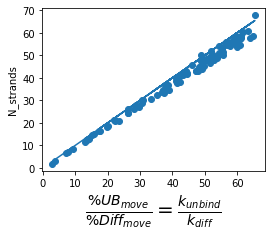

In [17]:
plt.scatter(count_N_av[:,2],count_N_av[:,1]/(count_N_av[:,0]))
plt.plot(count_N_av[:,2],count_N_av[:,2])
plt.xlabel(r'$\frac{\% UB_{move}}{\%Diff_{move}} = \frac{k_{unbind}}{k_{diff}}$',fontsize=20)
plt.ylabel('N_strands')

This graph shows that $k_\text{unbind} = N_\text{strands}k_\text{unbind}$